IMPORT LIBRARIES

In [1]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CLONING TRAFFIC SIGN DATASET

In [2]:
#clone repository
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [3]:
#list dataset contents
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [4]:
#load dataset
data=pd.read_csv('german-traffic-signs/signnames.csv')

In [5]:
#print dataset
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [6]:
#loading picckled dataset
with open("german-traffic-signs/train.p",mode='rb') as training:
  train = pickle.load(training)
with open("german-traffic-signs/valid.p",mode='rb') as validation:
  valid = pickle.load(validation)
with open("german-traffic-signs/test.p",mode='rb') as testing:
  test = pickle.load(testing)

In [7]:
#train features with respective labels
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [8]:
#give necessary shape to trained data
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


image label=13


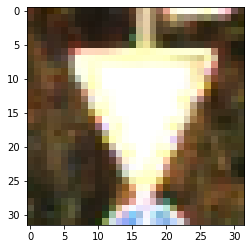

In [9]:
#select random images of traffic signs
index = np.random.randint(1,len(X_train))
plt.imshow(X_train[index])
print("image label={}".format(y_train[index]))

IMAGE PREPROCESSING

In [11]:
#Shuffling data so that our model avoids learning the order of images
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
#preprocessing images using equalizeHist function
def preprocessing(img):
  #convert to grayscale
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #apply histogram equivalence
  img = cv2.equalizeHist(img)
  #normalization
  img = img/255
  return img

In [13]:
#preprocessing images using map function
X_train_processed = np.array(list(map(preprocessing, X_train)))
X_validation_processed = np.array(list(map(preprocessing, X_validation)))
X_test_processed = np.array(list(map(preprocessing, X_test)))

In [15]:
#add images for convolution and reshape
X_train_processed = X_train_processed.reshape(34799,32,32,1)
X_test_processed = X_test_processed.reshape(12630,32,32,1)
X_validation_processed = X_validation_processed.reshape(4410,32,32,1)

In [16]:
#reshaping, Channels reduced from 3 to 1
print(X_train_processed.shape)
print(X_test_processed.shape)
print(X_validation_processed.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


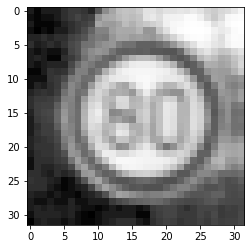

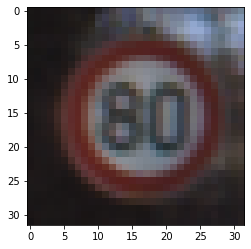

In [19]:
#extract original image for random image
i=random.randint(1,len(X_train))
plt.imshow(X_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i].squeeze())

BUILD, COMPILE AND TRAIN THE DEEP LEARNING MODEL

In [21]:
#name the model
model = Sequential()

#add convolutional layer to extract features
#add filter count, size of filters, input shape and activation function
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))

In [22]:
#pooling layer to reduce image size to 2*2
model.add(MaxPooling2D(pool_size=(2,2)))

#place a dropout layer to dropout 25% so as to avoid overfitting
model.add(Dropout(0.25))


In [24]:
#add another convolutional layer
model.add(Conv2D(64,(5,5),activation='relu'))

#pooling layer compressed
model.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
#flatten image to 1D array
model.add(Flatten())

In [26]:
#add dense layer with amount of nodes and activation
model.add(Dense(256,activation='relu'))

In [27]:
#place dropout layer
#0.5 dropout rate recommended
#half input nodes will be dropped out at each update, total=50% dropout
model.add(Dropout(0.5))

In [28]:
#defining output layer
#get your conclusion
model.add(Dense(43,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [32]:
#compile project
model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_processed,
                    y_train,
                    batch_size=500,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_validation_processed,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 70s 2ms/step - loss: 3.6017 - accuracy: 0.0537 - val_loss: 3.4542 - val_accuracy: 0.1531
Epoch 2/50
34799/34799 [==============================] - 69s 2ms/step - loss: 3.1362 - accuracy: 0.2046 - val_loss: 2.6073 - val_accuracy: 0.3800
Epoch 3/50
34799/34799 [==============================] - 69s 2ms/step - loss: 2.2793 - accuracy: 0.4038 - val_loss: 1.8183 - val_accuracy: 0.5018
Epoch 4/50
34799/34799 [==============================] - 68s 2ms/step - loss: 1.7542 - accuracy: 0.5104 - val_loss: 1.3790 - val_accuracy: 0.6190
Epoch 5/50
34799/34799 [==============================] - 69s 2ms/step - loss: 1.4372 - accuracy: 0.5846 - val_loss: 1.0924 - val_accuracy: 0.7204
Epoch 6/50
34799/34799 [==============================] - 71s 2ms/step - loss: 1.2154 - accuracy: 0.6390 - val_loss: 0.9071 - val_accuracy: 0.7705
Epoch 7/50
34799/34799 [==============================] - 70s 2ms/ste

EVALUATE PERFORMANCE

In [33]:
score = model.evaluate(X_test_processed,y_test)
print('Test accuracy',score[1])

12630/12630 [==============================] - 7s 583us/step
Test accuracy 0.9343626499176025


In [34]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0.5, 0, 'epochs')

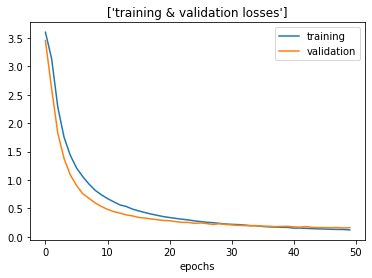

In [35]:
#training & validation losses plot graph
#loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title(['training & validation losses'])
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

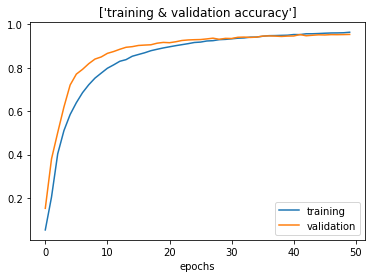

In [36]:
##training & validation accuracy plot graph
#accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title(['training & validation accuracy'])
plt.xlabel('epochs')

In [40]:
#generate prediction
prediction = model.predict_classes(X_test_processed)
y_true_label = y_test

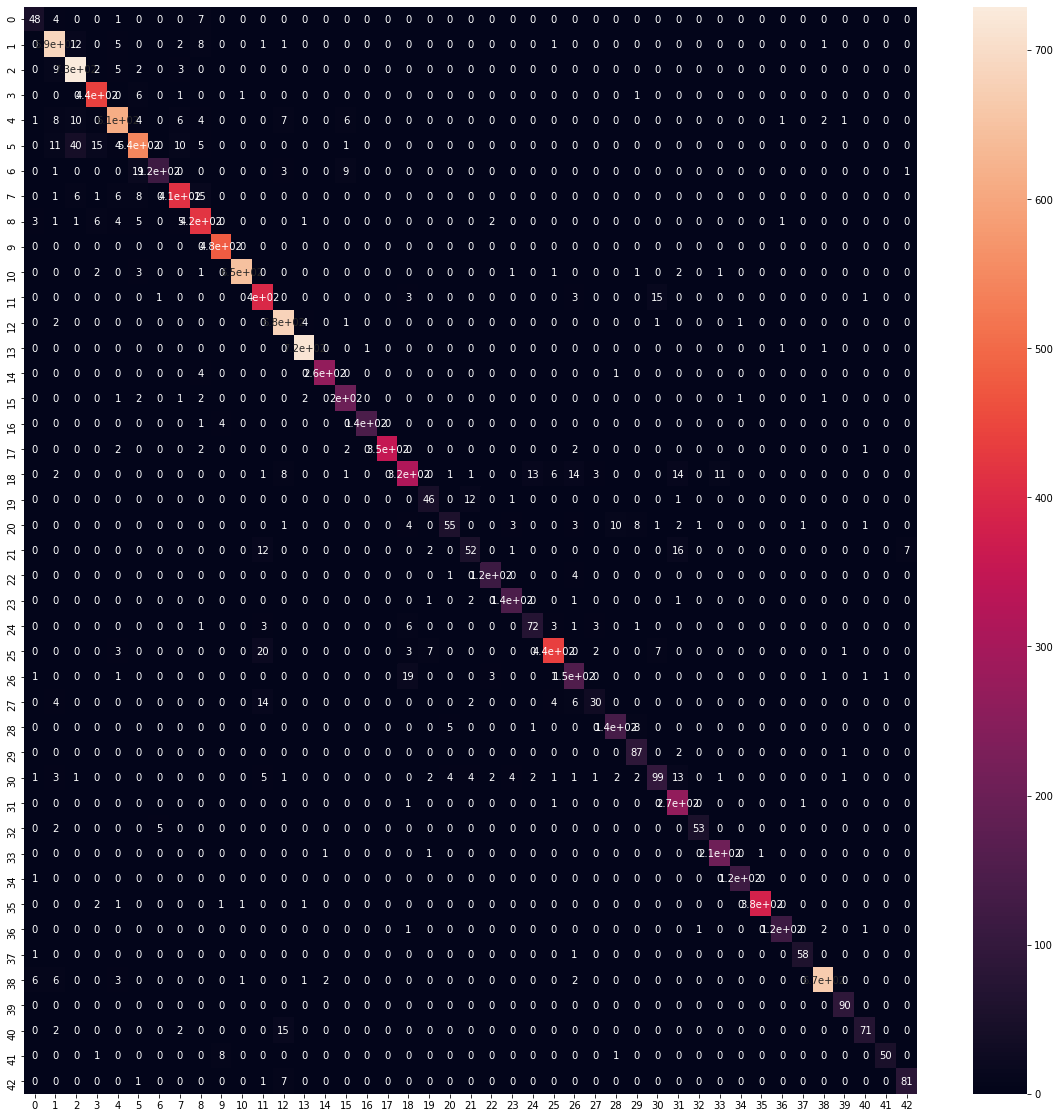

In [44]:
#confusion matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True)


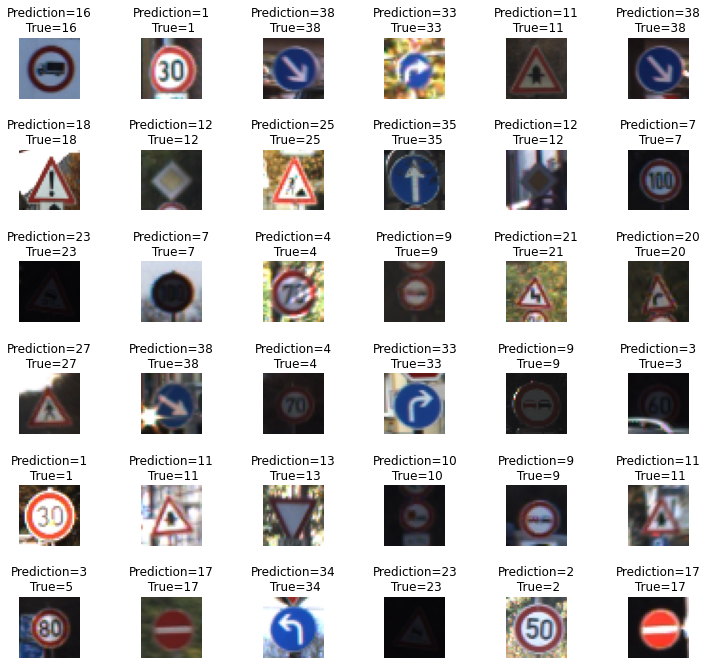

In [45]:
#find prediction
L=6
W=6
fig, axes = plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()
for i in range (0,L*W):
 axes[i].imshow(X_test[i])
 axes[i].set_title('Prediction={}\n True={}'.format(prediction[i],y_true_label[i]))
 axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [46]:
#save model
model.save('DL1.h5')